In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [252]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [254]:
# Load the CSV file
df = pd.read_csv('wine+quality/winequality-red.csv', sep=';')

In [258]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y) (quality)

X = df.drop('quality', axis=1)
y = df['quality']

# Make data into matrices
X = X.to_numpy()
y = y.to_numpy()

# Normalize
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X-X_mean) / X_std

# add w0 element
n,m = X.shape
X0 = np.ones((n,1))
X = np.hstack((X0,X))

# 80% for training+validation and 20% for testing
X_train_val, X_testM, y_train_val, y_testM = train_test_split(X, y, test_size=0.2, random_state=42)

# The 80% (training+validation) into 60% for training and 20% for validation
X_trainM, X_valM, y_trainM, y_valM = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


# Check the shape of the splits
print(f"Training set size: {X_trainM.shape}")
print(f"Validation set size: {X_valM.shape}")
print(f"Test set size: {X_testM.shape}")

Training set size: (959, 12)
Validation set size: (320, 12)
Test set size: (320, 12)


In [260]:
# find optimal w with closed form solution

w = np.linalg.inv(X_trainM.T @ X_trainM) @ X_trainM.T @ y_trainM

In [262]:
print(w)

[ 5.64187372e+00  1.25085501e-01 -2.03516859e-01 -4.24807241e-02
  4.71845564e-02 -6.36641619e-02  1.97705302e-02 -8.21659152e-02
 -9.70592054e-02 -1.74715417e-03  1.37009292e-01  2.77139674e-01]


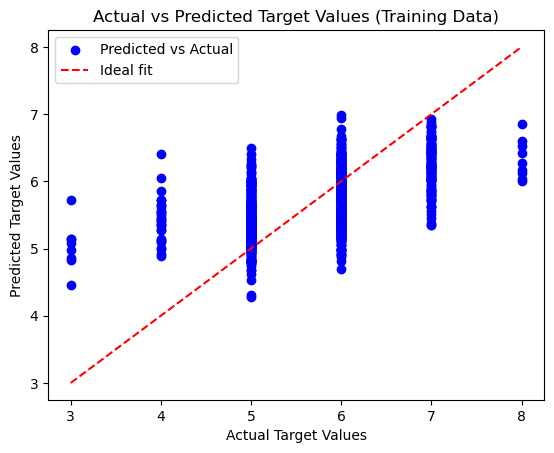

In [264]:
# Predictions on the training set
y_train_pred = X_trainM @ w  

# Plot actual vs predicted values
plt.scatter(y_train, y_train_pred, color='blue', label='Predicted vs Actual')

# Plot a 45-degree line (predictions perfectly match the actual values)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal fit')

# Add labels
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values (Training Data)')
plt.legend()
plt.show()


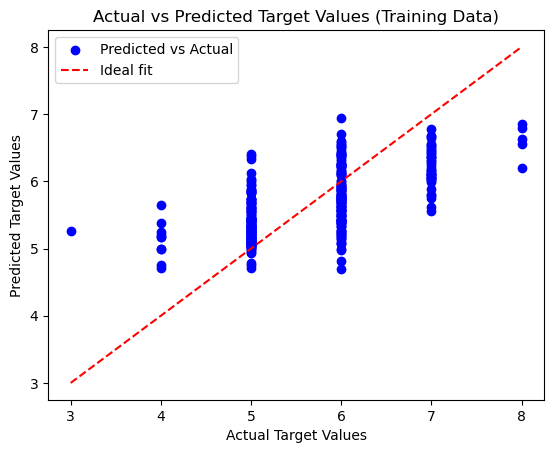

In [268]:
# This time on the test data

y_test_pred = X_testM @ w  


plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')


plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal fit')


plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values (Training Data)')
plt.legend()
plt.show()

In [270]:


# Calculate RMSE
rmse_train = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
rmse_test = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

# Print
print(f"RMSE on Training set: {rmse_train}")
print(f"RMSE on Test set: {rmse_test}")


RMSE on Training set: 0.6463332366831311
RMSE on Test set: 0.6218786699737956


In [298]:

def lms_algorithm(X, y, stepsize, iterations):
    
    m, n = X.shape  # Rows (m) and columns (n)
    
    # Random weights
    w = np.random.randn(n)  # 1xn

    # Iterate while updating weights
    for iteration in range(iterations):
        indices = np.random.permutation(m)  # random seed
        X = X[indices]  # Shuffle rows according to seed
        y = y[indices]  # the same but for y
        
        for i in range(m):  # Loop over each sample in the training set
            Xi = X[i, :]  # Row i
            yi = y[i]     # Real value for row i
             
            prediction = np.dot(Xi, w)  # Prediction for i-th sample
            error = prediction - yi     # Error for the i-th sample
            
            #Update weights
            w = w - stepsize * error * Xi
    
    return w


# Hyperparameters
stepsize = 0.001  
iterations = 1000

# find w
LMS_w = lms_algorithm(X_trainM, y_trainM, stepsize, iterations)


print(LMS_w)


[ 5.64038343e+00  1.23747043e-01 -2.06995883e-01 -4.08361694e-02
  4.21676501e-02 -6.38346544e-02  1.53605387e-02 -8.51051589e-02
 -1.05038226e-01 -6.10743551e-04  1.37429061e-01  2.83214328e-01]


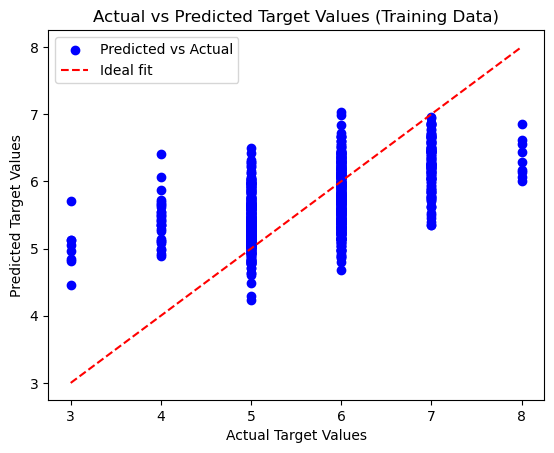

In [300]:
# Predictions training set using LMS
y_train_predLMS = X_trainM @ LMS_w 

# Plot
plt.scatter(y_train, y_train_predLMS, color='blue', label='Predicted vs Actual')

plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal fit')

# labels and title
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values (Training Data)')
plt.legend()
plt.show()

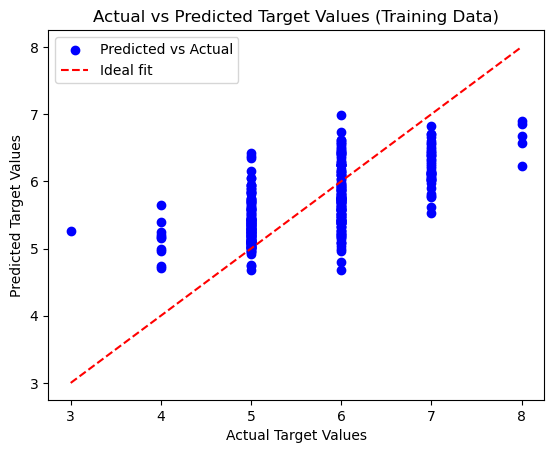

In [302]:
# Predictions on test set
y_test_predLMS = X_testM @ LMS_w 


plt.scatter(y_test, y_test_predLMS, color='blue', label='Predicted vs Actual')


plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal fit')


plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values (Training Data)')
plt.legend()
plt.show()

In [306]:


# RMSE LMS
rmse_trainLMS = np.sqrt(np.mean((y_train - y_train_predLMS) ** 2))
rmse_testLMS = np.sqrt(np.mean((y_test - y_test_predLMS) ** 2))

print(f"RMSE on Training set: {rmse_trainLMS}")
print(f"RMSE on Test set: {rmse_testLMS}")

RMSE on Training set: 0.6465815939118909
RMSE on Test set: 0.6222920984800353
